### Sleep Health and Lifestyle Dataset   


The sleep Health and Lifestyle dataset contains 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, physical activity, stress level, BMI category, blood preassure, heart rate, daily steps, and the presence or abscence of sleep disorders.

We have the data of 374 people and there lifestyle and were going to abserve who sleeps the best and who sleeps the worst.

## Below this is the data of the first 5 people just to see if its working prperly.(test run)

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Dataset Information

In [8]:
df.dtypes


Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

## Does Occupation affect how much sleep you get?

First were going to see if occupation has anything to do in how much you get to sleep. We're going to see which occupation sleeps the most and which gets the lest sleep 

AS you can see below if we go based of occupation an Engeneer sleeps the most with an average of 7.9 hours a day and the quality of sleep is an 8 out of 10. The occupation with the least amount of sleep is a sales representative with an average of 5.9 hours of sleep, and a 4 out of 10 for quality of sleep. 

In [6]:
occupation_sleep_stats = df.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean().sort_values(by='Sleep Duration', ascending=False)
print(occupation_sleep_stats)

                      Sleep Duration  Quality of Sleep
Occupation                                            
Engineer                    7.987302          8.412698
Lawyer                      7.410638          7.893617
Accountant                  7.113514          7.891892
Nurse                       7.063014          7.369863
Doctor                      6.970423          6.647887
Manager                     6.900000          7.000000
Software Engineer           6.750000          6.500000
Teacher                     6.690000          6.975000
Salesperson                 6.403125          6.000000
Scientist                   6.000000          5.000000
Sales Representative        5.900000          4.000000


## Below is the number of people that work in each field

In [15]:
occupation_counts = df['Occupation'].value_counts()
print(occupation_counts)

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


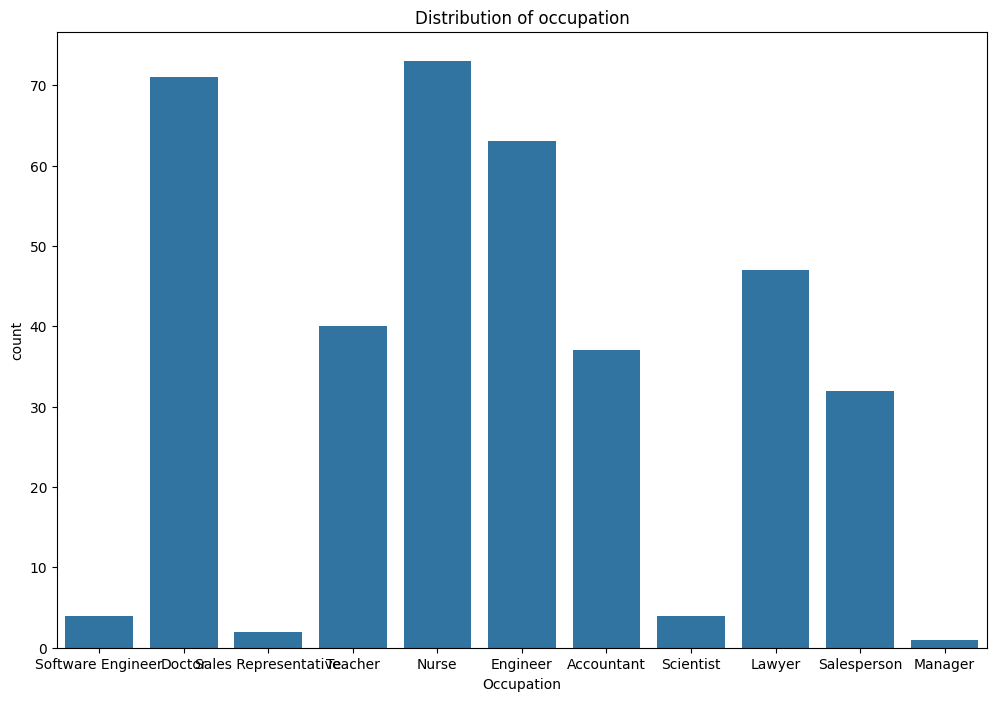

In [14]:
# Distribution of occupation

plt.figure(figsize=(12,8))
sns.countplot(x='Occupation', data=df)
plt.title('Distribution of occupation')
plt.show()


## Does getting enough sleep affect your health?

Now we're going to see the person with the most sleep and the person that gets the least sleep and compare the data

The person with the most sleep is much more healthier her BMI is normal, her heart rate is 65, and she does not have a sleep disorder. On the other hand the person with the least sleep is overweight, her heart rate is 81, and she has a sleep disorder. She is far less healthier than the person that gets the most sleep. We can conclude that if you get a good amount of sleep you're more likely to be healthier.

### Person with the most amount of sleep

In [17]:
max_sleep_row = df['Sleep Duration'].idxmax()
print(f"The row number of the person with the most sleep duration is: {max_sleep_row}")
df.loc[max_sleep_row]

The row number of the person with the most sleep duration is: 298


Person ID                       299
Gender                       Female
Age                              51
Occupation                 Engineer
Sleep Duration                  8.5
Quality of Sleep                  9
Physical Activity Level          30
Stress Level                      3
BMI Category                 Normal
Blood Pressure               125/80
Heart Rate                       65
Daily Steps                    5000
Sleep Disorder                  NaN
Name: 298, dtype: object

### person with the least amount of sleep

In [18]:
min_sleep_row = df['Sleep Duration'].idxmin()
print(f"The row number of the person with the least sleep duration is: {min_sleep_row}")
df.loc[min_sleep_row]

The row number of the person with the least sleep duration is: 80


Person ID                           81
Gender                          Female
Age                                 34
Occupation                   Scientist
Sleep Duration                     5.8
Quality of Sleep                     4
Physical Activity Level             32
Stress Level                         8
BMI Category                Overweight
Blood Pressure                  131/86
Heart Rate                          81
Daily Steps                       5200
Sleep Disorder             Sleep Apnea
Name: 80, dtype: object

## DO people with a BMI in the normal range get more sleep than those classified as overweight?

### Below is the overweight BMI category and most people sleep in the 6 to 6.5 range. They get less sleep than the normal BMI category.

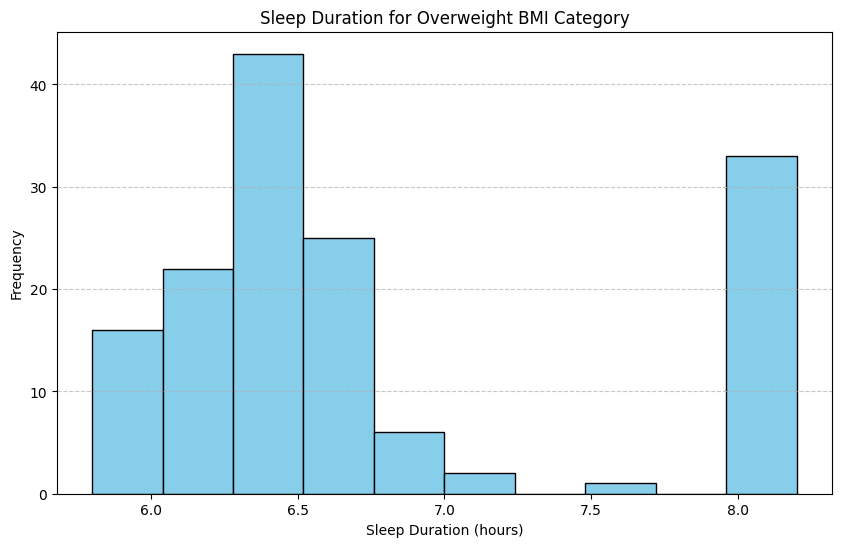

In [21]:
# Filter data for "Overweight" BMI category
overweight_sleep_data = df[df['BMI Category'] == 'Overweight']

# Plot the sleep duration for the "Overweight" BMI category
plt.figure(figsize=(10, 6))
plt.hist(overweight_sleep_data['Sleep Duration'], bins=10, color='skyblue', edgecolor='black')
plt.title('Sleep Duration for Overweight BMI Category')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Below is the Normal BMI category and the range is 7-8 hours. With this informatin we can conclude that the Normal BMI category get more sleep.

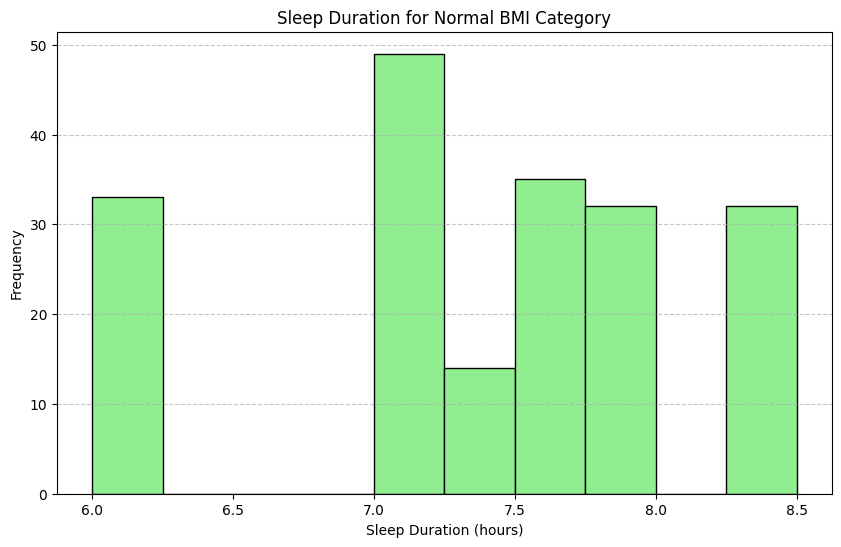

In [22]:
# Filter data for "Normal" BMI category
normal_bmi_sleep_data = df[df['BMI Category'] == 'Normal']

# Plot the sleep duration for the "Normal" BMI category
plt.figure(figsize=(10, 6))
plt.hist(normal_bmi_sleep_data['Sleep Duration'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Sleep Duration for Normal BMI Category')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()